In [1]:
import numpy
import numpy as np
from mat4py import loadmat
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn import tree
import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

def scaler(X):
    X = (X-np.mean(X, axis=0))/np.std(X, axis=0, ddof=1)
    return X

In [2]:
data = loadmat('ML-R-MG.mat')
data_training = data['trainingset_HTEonly']
data_test = data['testset_HTEonly']
data_liter = data['allset_Literature']
data_training = np.asarray(data_training, dtype=np.float64)
data_test = np.asarray(data_test, dtype=np.float64)
data_liter = np.asarray(data_liter, dtype=np.float64)

In [3]:
x_train = np.c_[data_training[:,1]*1000000,data_training[:,3],data_training[:,5]]
x_test = np.c_[data_test[:,1]*1000000,data_test[:,3],data_test[:,5]]
x_ind = np.c_[data_liter[:,1]*1000000,data_liter[:,3],data_liter[:,5]]
y_train = data_training[:, 8]
y_test = data_test[:, 8]
y_ind = data_liter[:, 8]


In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [5]:
print(clf.score(x_test, y_test)*100)
print(clf.score(x_ind, y_ind)*100)

83.33333333333334
69.45812807881774


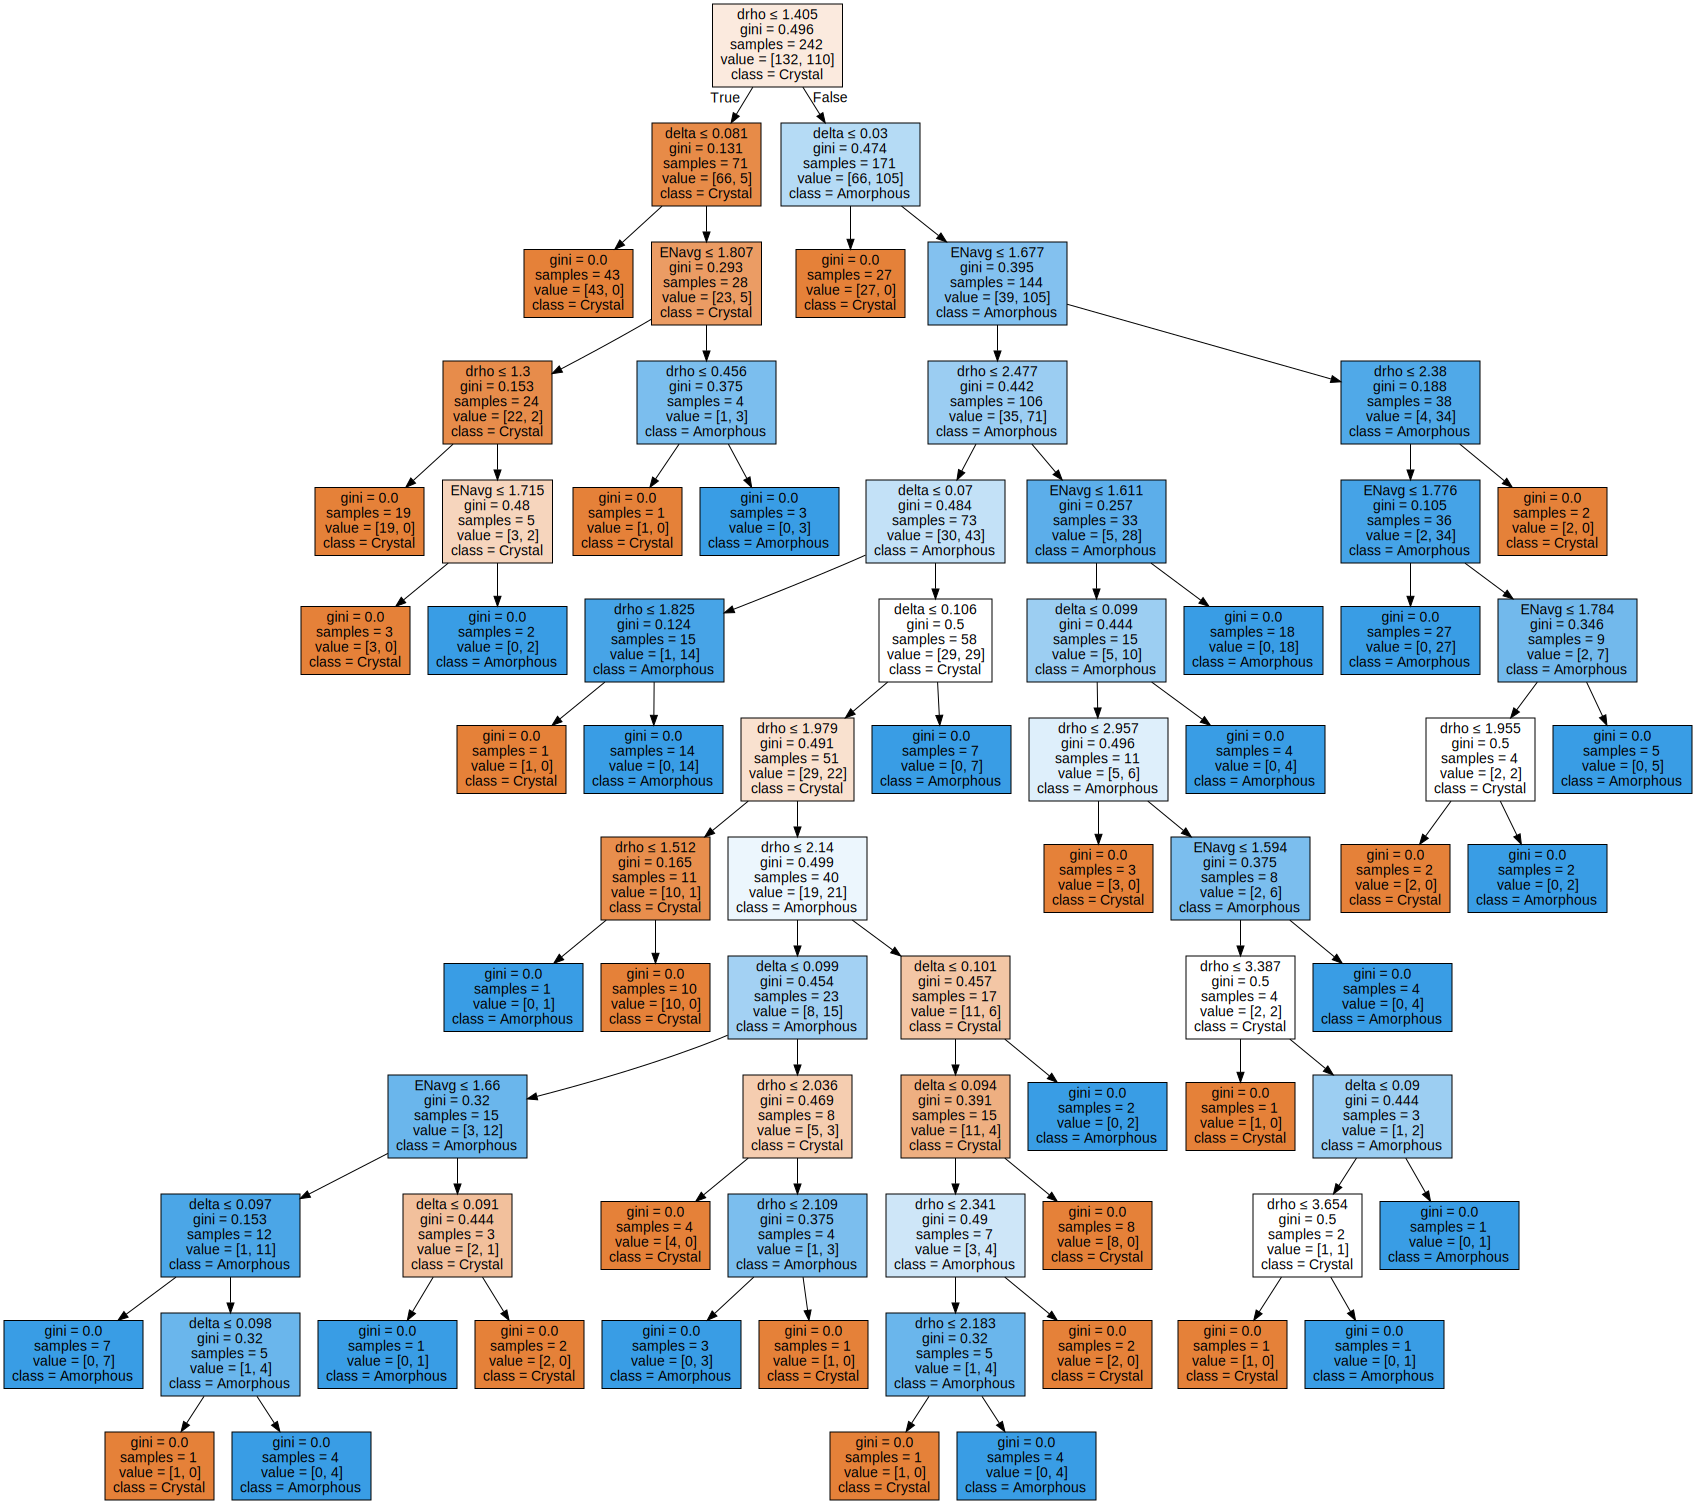

In [6]:
dot_data = tree.export_graphviz(clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ["drho","delta","ENavg"],  # feature 이름
                               class_names = ["Crystal","Amorphous"],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = False,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나
graph = graphviz.Source(dot_data)
graph

In [7]:
graph.render("lala",format="png", view=True)

'lala.png'

In [8]:
clf2 = tree.DecisionTreeClassifier(max_depth=3)
clf2 = clf2.fit(x_train, y_train)

In [9]:
print(clf2.score(x_test, y_test)*100)
print(clf2.score(x_ind, y_ind)*100)

78.33333333333333
75.86206896551724


In [10]:
dot_data2 = tree.export_graphviz(clf2,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ["drho","delta","ENavg"],  # feature 이름
                               class_names = ["Crystal","Amorphous"],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = False,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나
graph2 = graphviz.Source(dot_data2)
graph2


graph2.render("lala2",format="png", view=True)

'lala2.png'

In [14]:
x_train3 = np.c_[data_training[:,1]*1000000,data_training[:,3],data_training[:,4],data_training[:,5],data_training[:,6]]
x_test3 = np.c_[data_test[:,1]*1000000,data_test[:,3],data_test[:,4],data_test[:,5],data_test[:,6]]
x_ind3 = np.c_[data_liter[:,1]*1000000,data_liter[:,3],data_liter[:,4],data_liter[:,5],data_liter[:,6]]
y_train3 = data_training[:, 8]
y_test3 = data_test[:, 8]
y_ind3 = data_liter[:, 8]


clf3 = tree.DecisionTreeClassifier(max_depth=4)
clf3 = clf3.fit(x_train3, y_train3)
print(clf3.score(x_train3, y_train3)*100)
print(clf3.score(x_test3, y_test3)*100)
print(clf3.score(x_ind3, y_ind3)*100)

84.29752066115702
80.0
80.04926108374384


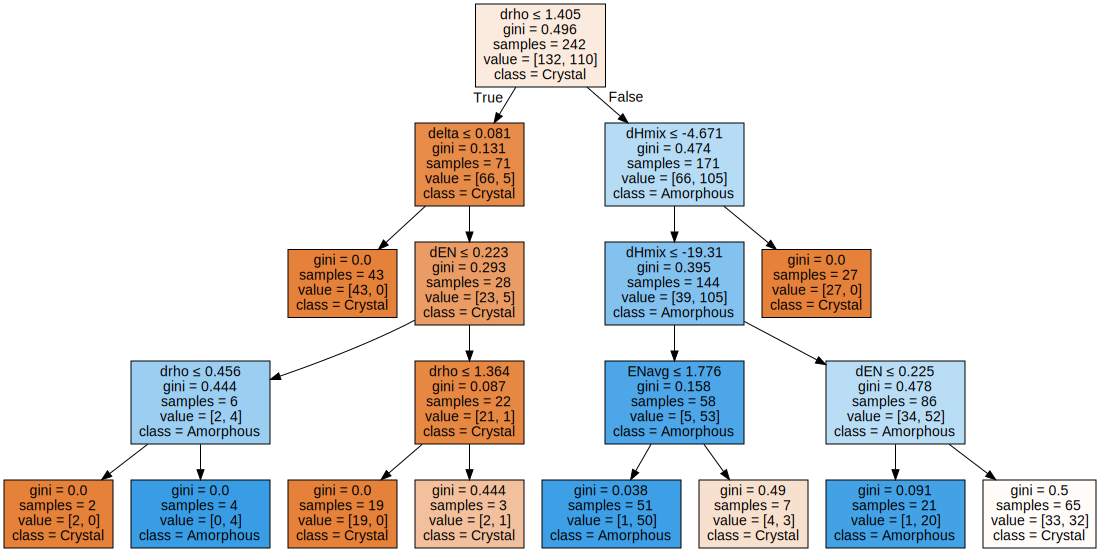

In [15]:
dot_data3 = tree.export_graphviz(clf3,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ["drho", "delta", "dHmix", "ENavg", "dEN"],  # feature 이름
                               class_names = ["Crystal","Amorphous"],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = False,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나
graph3 = graphviz.Source(dot_data3)
graph3

In [16]:

graph3.render("lala3",format="png", view=True)

'lala3.png'